In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

In [2]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

# Tabulation

In [3]:
import urllib.request
import json

In [4]:
url = 'https://api.covid19india.org/states_daily.json'
urllib.request.urlretrieve(url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7fc890f82240>)

In [5]:
with open('data.json') as f:
    data = json.load(f)

In [6]:
data = data['states_daily']
data = pd.json_normalize(data)

In [7]:
data.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [8]:
data['date'] = pd.to_datetime(data['date'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1563 entries, 0 to 1562
Data columns (total 42 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   an       1563 non-null   object        
 1   ap       1563 non-null   object        
 2   ar       1563 non-null   object        
 3   as       1563 non-null   object        
 4   br       1563 non-null   object        
 5   ch       1563 non-null   object        
 6   ct       1563 non-null   object        
 7   date     1563 non-null   datetime64[ns]
 8   dateymd  1563 non-null   object        
 9   dd       1563 non-null   object        
 10  dl       1563 non-null   object        
 11  dn       1563 non-null   object        
 12  ga       1563 non-null   object        
 13  gj       1563 non-null   object        
 14  hp       1563 non-null   object        
 15  hr       1563 non-null   object        
 16  jh       1563 non-null   object        
 17  jk       1563 non-null   object  

In [10]:
data['status'].unique()

array(['Confirmed', 'Recovered', 'Deceased'], dtype=object)

In [11]:
data_confirmed = data[data['status'] == 'Confirmed']

In [12]:
data_confirmed.drop('status', axis = 1, inplace = True)
data_confirmed.drop('date', axis = 1, inplace = True)
data_confirmed.drop('dateymd', axis = 1, inplace = True)

In [13]:
data_confirmed = data_confirmed.apply(pd.to_numeric)

In [14]:
data_confirmed['date'] = pd.to_datetime(data['date'])

In [15]:
data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 1560
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   an      521 non-null    int64         
 1   ap      521 non-null    int64         
 2   ar      521 non-null    int64         
 3   as      521 non-null    int64         
 4   br      521 non-null    int64         
 5   ch      521 non-null    int64         
 6   ct      521 non-null    int64         
 7   dd      521 non-null    int64         
 8   dl      521 non-null    int64         
 9   dn      521 non-null    int64         
 10  ga      521 non-null    int64         
 11  gj      521 non-null    int64         
 12  hp      521 non-null    int64         
 13  hr      521 non-null    int64         
 14  jh      521 non-null    int64         
 15  jk      521 non-null    int64         
 16  ka      521 non-null    int64         
 17  kl      521 non-null    int64         
 18  la      5

In [16]:
data_confirmed.set_index('date', inplace = True)

In [17]:
data_confirmed.head(5)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,0,7,0,...,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,0,2,0,...,3,0,8,1,0,37,0,2,1,0


## Styling Tabulation

In [18]:
data_confirmed.head(5).style

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-14 00:00:00,0,1,0,0,0,0,0,0,7,0,0,0,0,14,0,2,6,19,0,0,14,0,0,0,0,0,0,1,0,3,0,1,1,0,81,0,12,0,0
2020-03-15 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,18,0,0,0,0,0,0,0,0,1,0,2,0,0,27,0,1,0,0
2020-03-16 00:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,0,0,6,0,0,0,0,0,1,0,1,0,0,1,0,0,15,0,0,1,0
2020-03-17 00:00:00,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,11,0,2,0,1
2020-03-18 00:00:00,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,1,5,0,8,0,3,0,0,0,0,0,1,1,0,3,0,8,1,0,37,0,2,1,0


In [19]:
data_confirmed.tail(5).style.highlight_max(color = 'red').highlight_min(color = 'green')

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,0,49,1,88,17,354,16,44,176,1857,21445,9,6,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,40081,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,0,50,0,67,23,333,26,32,129,1669,20452,6,4,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,38761,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,0,50,0,88,25,284,14,28,135,1632,19451,9,7,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,36135,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,0,53,0,75,16,182,22,27,97,1431,18582,6,3,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,33245,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,0,27,2,62,14,276,22,35,77,1065,12294,4,6,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,24696,0,17,18,502


In [20]:
df = data_confirmed.tail(5)

In [21]:
def bold_max_cols(x):
    ismax = (x == x.max())
    return ['font-weight: bold' if y else '' for y in ismax]

In [22]:
df.style.apply(bold_max_cols)

,an,ap,ar,as,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,0,49,1,88,17,354,16,44,176,1857,21445,9,6,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,40081,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,0,50,0,67,23,333,26,32,129,1669,20452,6,4,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,38761,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,0,50,0,88,25,284,14,28,135,1632,19451,9,7,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,36135,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,0,53,0,75,16,182,22,27,97,1431,18582,6,3,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,33245,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,0,27,2,62,14,276,22,35,77,1065,12294,4,6,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,24696,0,17,18,502


In [23]:
df.drop(['tt','dd','ld'], axis = 1, inplace = True)

In [24]:
df.style.apply(bold_max_cols).highlight_min(color = 'green')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,0,17,18,502


In [25]:
df.style.background_gradient(cmap = 'Reds')

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,0,17,18,502


In [26]:
df.style.background_gradient(cmap = 'Reds', axis = 1)

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,0,17,18,502


In [27]:
df.style.background_gradient(cmap = 'Reds', subset = ['mh', 'dl', 'tn'])

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,0,17,18,502


In [28]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-12 00:00:00,0,1859,180,935,43,12,98,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,0,17,18,502


In [29]:
df_ = df[['mh', 'tn', 'dl']]

In [30]:
df_.style.bar()

,mh,tn,dl
date,,,
2021-08-12 00:00:00,6388,1942,49
2021-08-13 00:00:00,6686,1933,50
2021-08-14 00:00:00,5787,1916,50
2021-08-15 00:00:00,4797,1896,53
2021-08-16 00:00:00,4145,1851,27


In [31]:
df_.style.bar(subset = ['mh'], color = 'red').bar(subset = ['tn'], color = 'orange').bar(subset = 'dl', color = 'green')

,mh,tn,dl
date,,,
2021-08-12 00:00:00,6388,1942,49
2021-08-13 00:00:00,6686,1933,50
2021-08-14 00:00:00,5787,1916,50
2021-08-15 00:00:00,4797,1896,53
2021-08-16 00:00:00,4145,1851,27


# Distribution of Data

## Distribution of Single Continuous variable

### Histogram

In [32]:
x = np.random.normal(size = 1000)

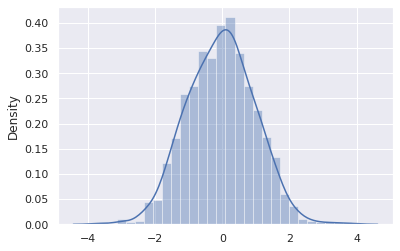

In [33]:
sns.distplot(x);

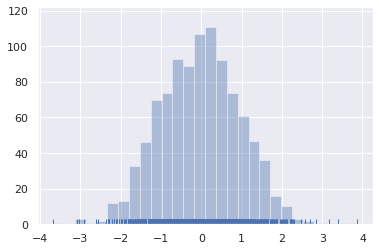

In [34]:
sns.distplot(x, kde = False, rug = True);

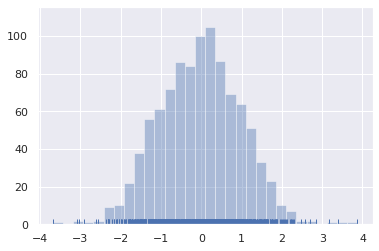

In [35]:
sns.distplot(x, kde = False, rug = True, bins = 30);

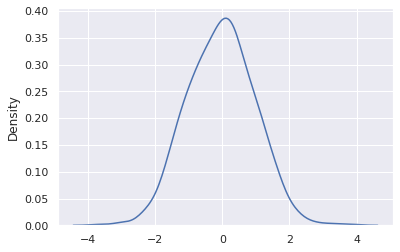

In [36]:
sns.kdeplot(x);

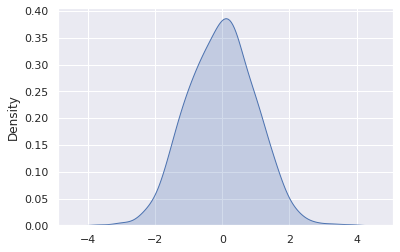

In [37]:
sns.kdeplot(x, shade = True);

In [38]:
y = np.random.uniform(size = 1000)

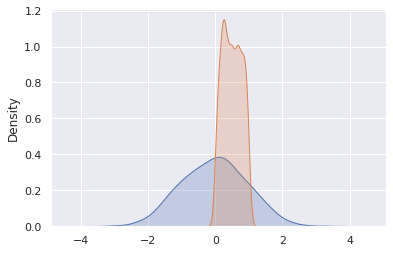

In [39]:
sns.kdeplot(x, shade = True)
sns.kdeplot(y, shade = True);

In [40]:
dia = sns.load_dataset("diamonds")

In [41]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [43]:
dia.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

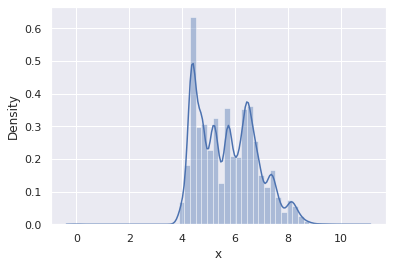

In [44]:
sns.distplot(dia.x);

<AxesSubplot:xlabel='x', ylabel='Density'>

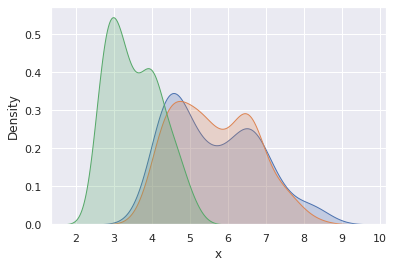

In [45]:
sns.kdeplot(dia.sample(100).x, shade = True)
sns.kdeplot(dia.sample(100).y, shade = True)
sns.kdeplot(dia.sample(100).z, shade = True)

### Box Plot

In [46]:
x = np.random.normal(size = 1000)

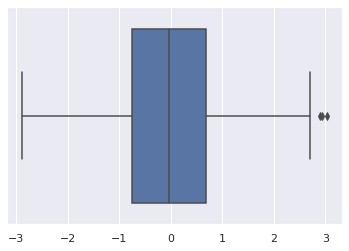

In [47]:
sns.boxplot(x, whis = 1.5);

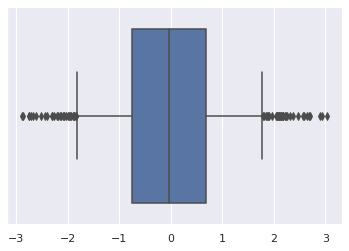

In [48]:
sns.boxplot(x, whis = 0.75); #1.5 is default

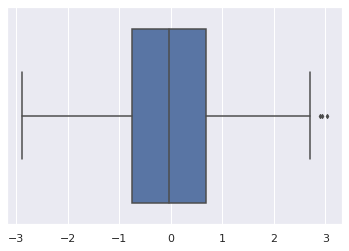

In [49]:
sns.boxplot(x, whis = 1.5, fliersize = 3, orient = 'v');

### Boxen Plot

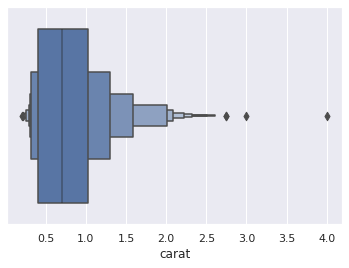

In [50]:
sns.boxenplot(dia.sample(5000).carat);

## Distribution of Categorical value

In [51]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
dcut = dia.groupby('cut')['cut'].count()

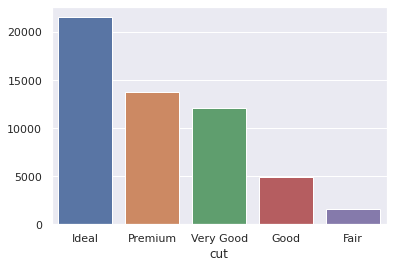

In [53]:
sns.barplot(x = dcut.index, y = dcut.values);

In [54]:
dclarity = dia.groupby('clarity')['clarity'].count()

In [55]:
dclarity.head()

clarity
IF       1790
VVS1     3655
VVS2     5066
VS1      8171
VS2     12258
Name: clarity, dtype: int64

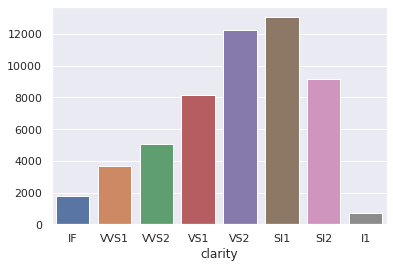

In [56]:
sns.barplot(x = dclarity.index, y = dclarity.values);

## Joint Distribution of 2 variables

### Joint plot

In [57]:
x = np.random.normal(size = 500)
y = np.random.normal(size = 500)

In [58]:
df = pd.DataFrame({'x':x, 'y':y})

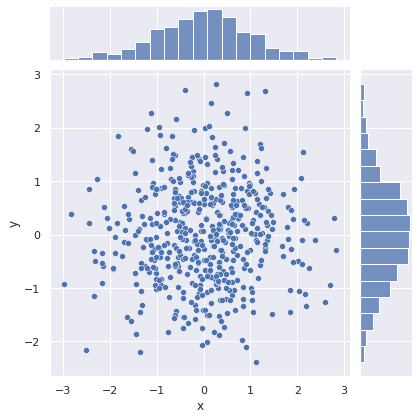

In [59]:
sns.jointplot('x', 'y', data = df);

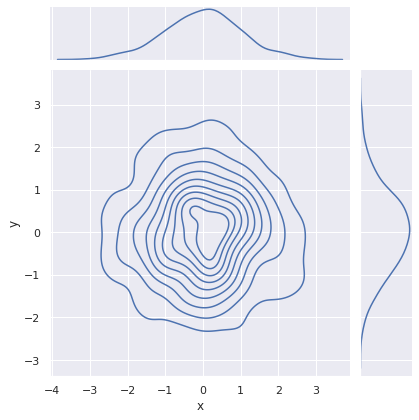

In [60]:
sns.jointplot('x', 'y', data = df, kind = 'kde');

In [61]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


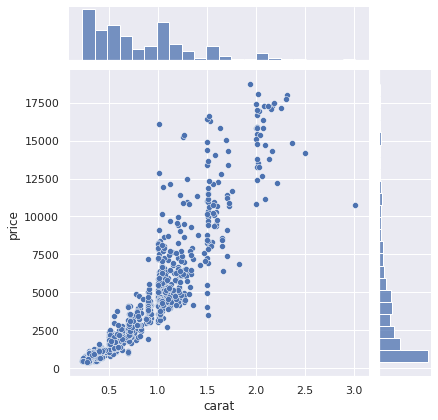

In [62]:
sns.jointplot('carat', 'price', data = dia.sample(1000));

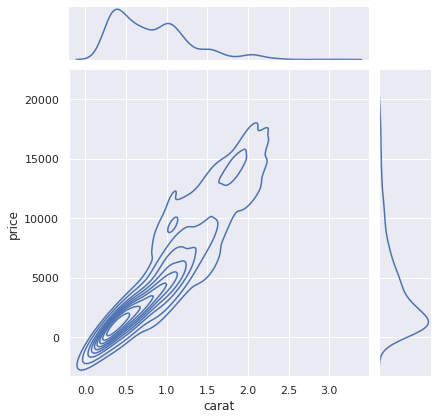

In [63]:
sns.jointplot('carat', 'price', data = dia.sample(1000), kind = 'kde');

### Swarm Plot

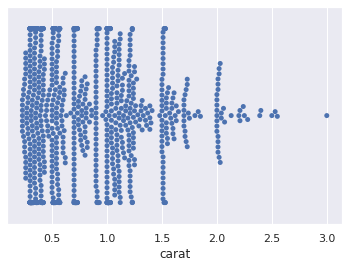

In [64]:
sns.swarmplot(dia.sample(1000).carat);

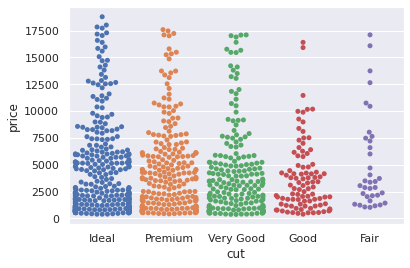

In [65]:
sns.swarmplot('cut', 'price', data = dia.sample(1000));

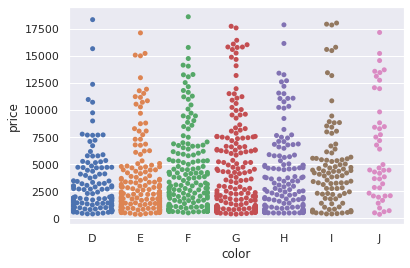

In [66]:
sns.swarmplot('color', 'price', data = dia.sample(1000));

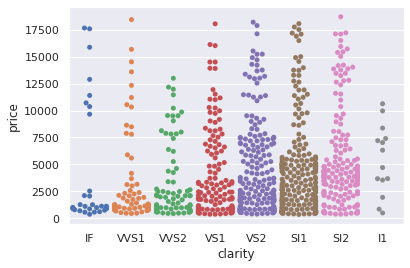

In [67]:
sns.swarmplot('clarity', 'price', data = dia.sample(1000));

In [68]:
p = sns.load_dataset("penguins")

In [69]:
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [70]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [71]:
p.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [72]:
p.dropna(inplace = True)

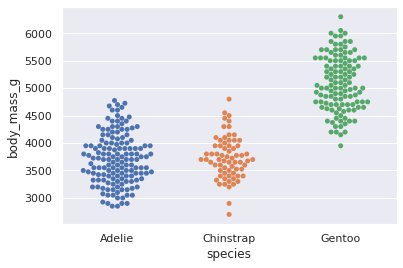

In [73]:
sns.swarmplot('species', 'body_mass_g', data = p);

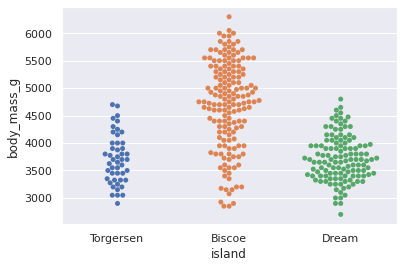

In [74]:
sns.swarmplot('island', 'body_mass_g', data = p);

### Violin Plot

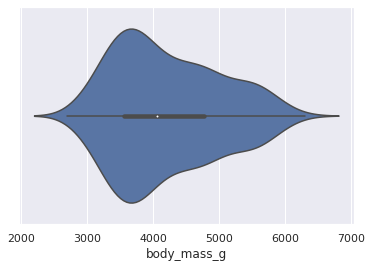

In [75]:
sns.violinplot(x = 'body_mass_g', data = p);

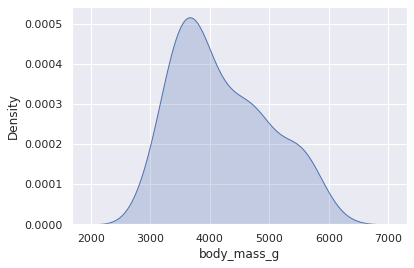

In [76]:
sns.kdeplot(p['body_mass_g'], shade = True);

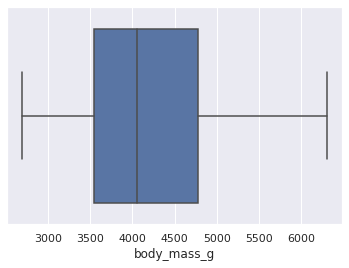

In [77]:
sns.boxplot(x = 'body_mass_g', data = p);

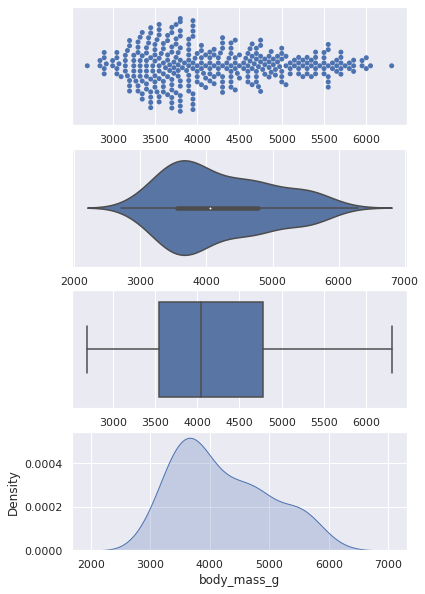

In [78]:
fig, axs = plt.subplots(nrows = 4)
fig.set_size_inches(6, 10)
sns.swarmplot(x = 'body_mass_g', data = p, ax = axs[0]);
sns.violinplot(x = 'body_mass_g', data = p, ax = axs[1]);
sns.boxplot(x = 'body_mass_g', data = p, ax = axs[2]);
sns.kdeplot(p['body_mass_g'], shade = True, ax = axs[3]);

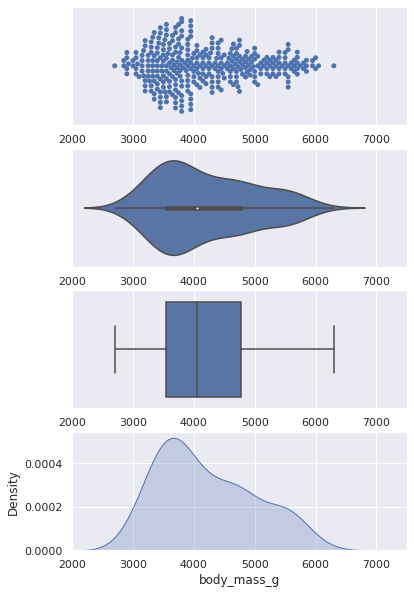

In [79]:
fig, axs = plt.subplots(nrows = 4)
fig.set_size_inches(6, 10)
sns.swarmplot(x = 'body_mass_g', data = p, ax = axs[0]).set(xlim = (2000, 7500));
sns.violinplot(x = 'body_mass_g', data = p, ax = axs[1]).set(xlim = (2000, 7500));
sns.boxplot(x = 'body_mass_g', data = p, ax = axs[2]).set(xlim = (2000, 7500));
sns.kdeplot(p['body_mass_g'], shade = True, ax = axs[3]).set(xlim = (2000, 7500));

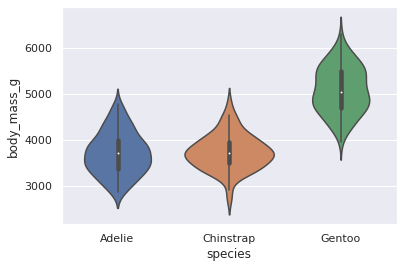

In [80]:
sns.violinplot('species', 'body_mass_g', data = p);

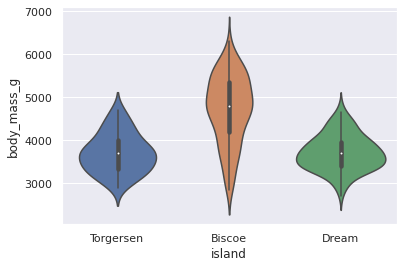

In [81]:
sns.violinplot('island', 'body_mass_g', data = p);

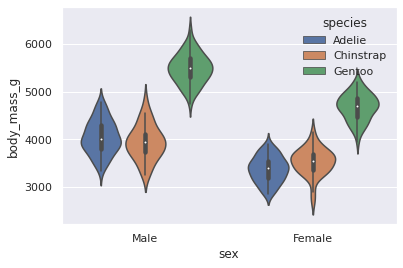

In [82]:
sns.violinplot('sex', 'body_mass_g', hue = 'species', data = p);

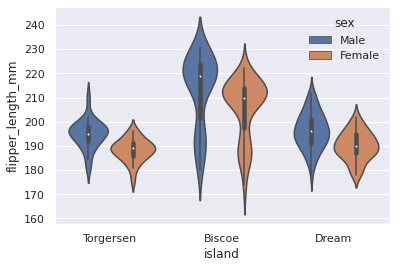

In [83]:
sns.violinplot('island', 'flipper_length_mm', hue = 'sex', data = p);

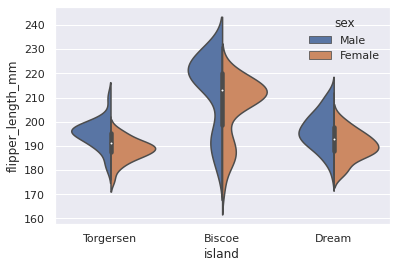

In [84]:
sns.violinplot('island', 'flipper_length_mm', hue = 'sex', split = 'True', data = p);

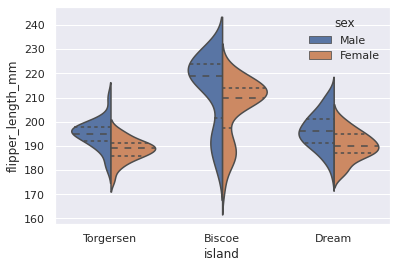

In [85]:
sns.violinplot('island', 'flipper_length_mm', 
               hue = 'sex', split = 'True',
               inner = 'quartile', data = p);

In [86]:
p.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [87]:
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

In [88]:
p.binary_species.unique()

array(['Adelie | Chinstrap', 'Gentoo'], dtype=object)

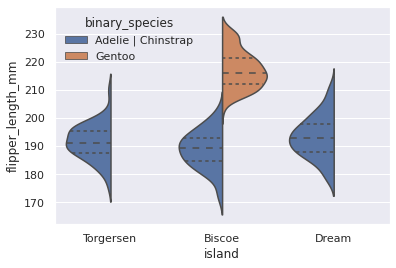

In [89]:
sns.violinplot('island', 'flipper_length_mm', 
               hue = 'binary_species', inner = 'quartile', split = 'True', data = p);

### Faceted Plotting

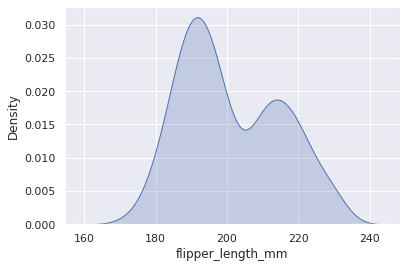

In [90]:
sns.kdeplot(p.flipper_length_mm, shade = True);

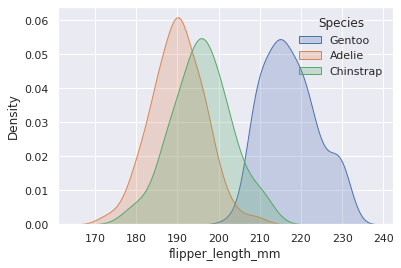

In [91]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade = True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade = True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade = True);
plt.legend(title = "Species", labels = ['Gentoo', 'Adelie', 'Chinstrap']);

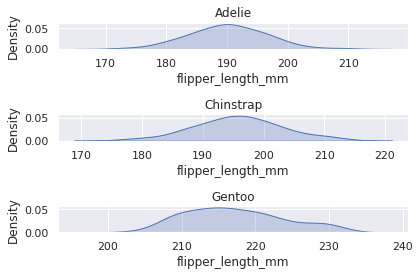

In [92]:
column_name = 'species'
nrows = len(p[column_name].unique())
fig, axs = plt.subplots(nrows = nrows)
i = 0
for cv in p[column_name].unique():
    sns.kdeplot(p[p[column_name] == cv].flipper_length_mm, shade = True, ax = axs[i]).set_title(cv);
    i = i + 1
plt.tight_layout()

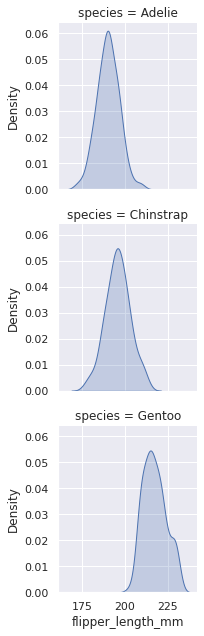

In [93]:
g = sns.FacetGrid(p, row = 'species');
g.map(sns.kdeplot, 'flipper_length_mm', shade =True)

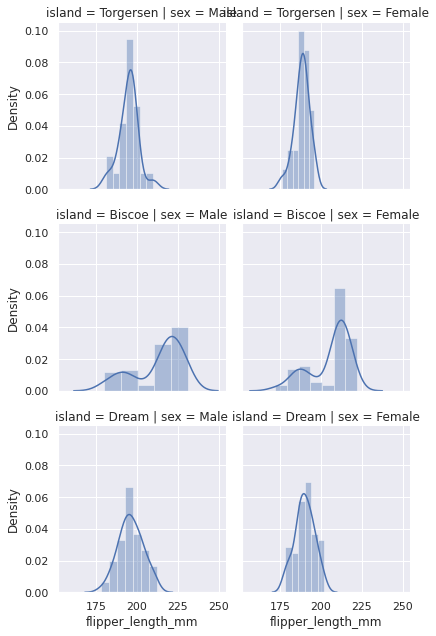

In [94]:
g = sns.FacetGrid(p, row = 'island', col = 'sex');
g.map(sns.distplot, 'flipper_length_mm');

### Pair Plot

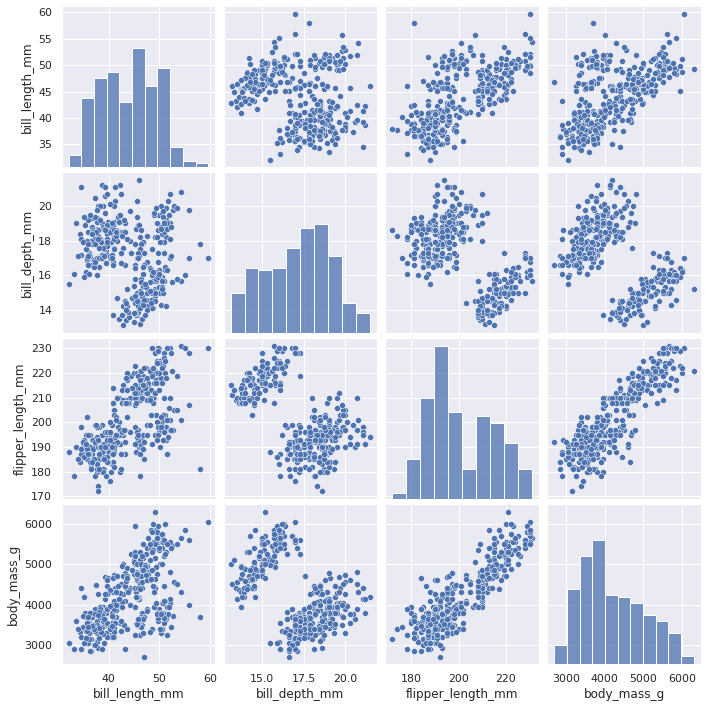

In [95]:
sns.pairplot(p);

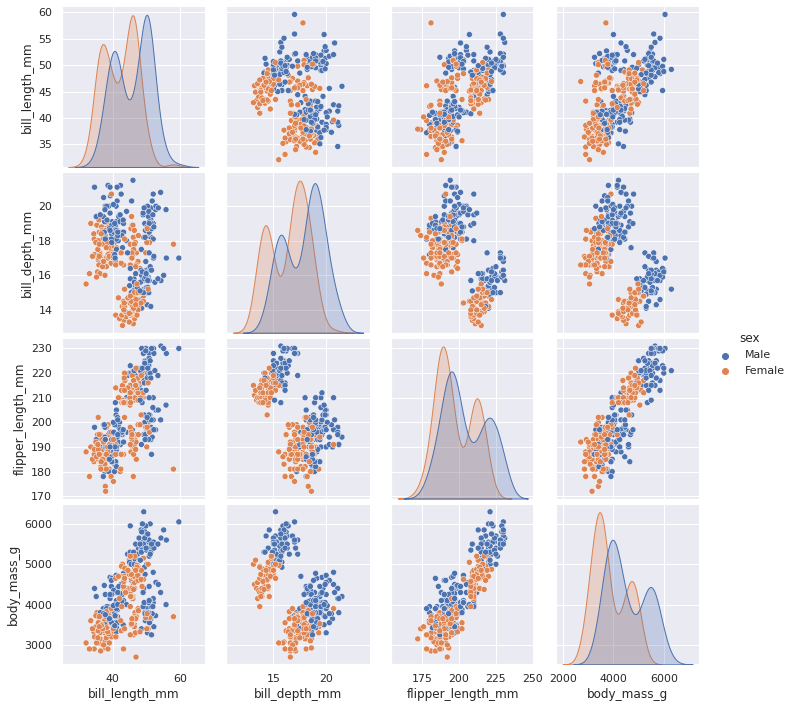

In [96]:
sns.pairplot(p, hue = 'sex');

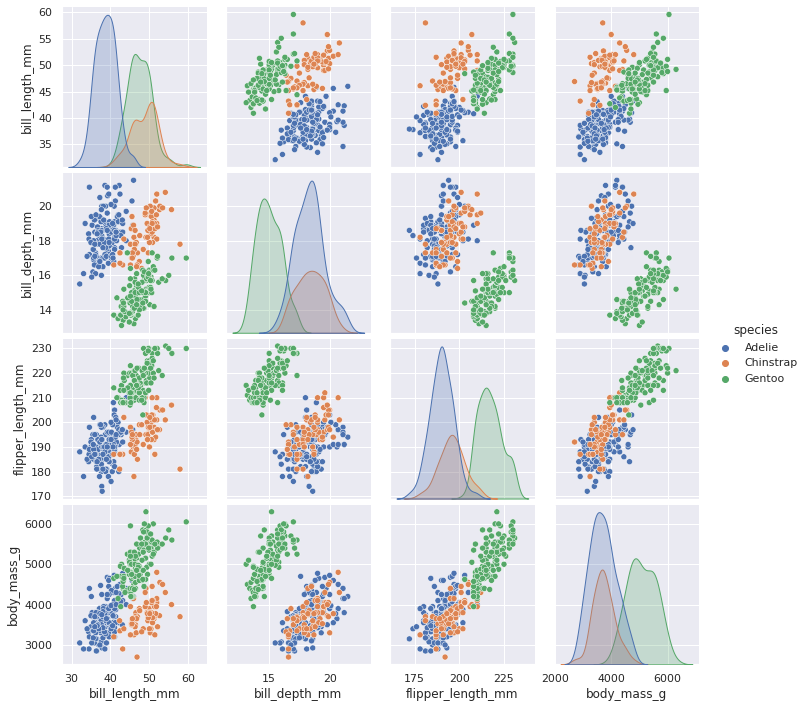

In [97]:
sns.pairplot(p , hue = 'species')

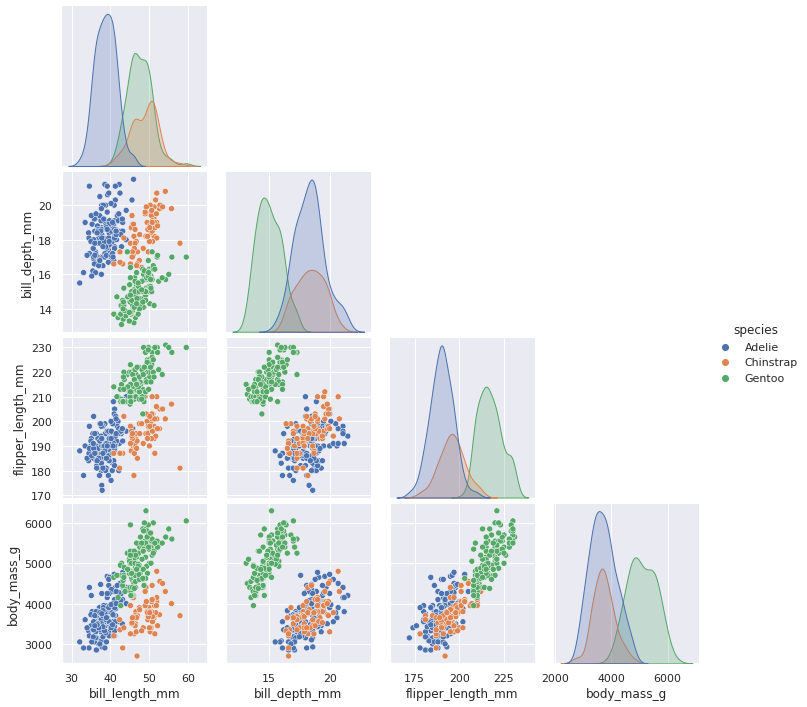

In [98]:
sns.pairplot(p, hue = 'species', corner = True);